In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import sklearn

In [2]:
from IPython.display import display
data = pd.read_csv(
"D://adult.csv",header=None,index_col=False,names=['age','workclass','fnlwgt','education','education_num','marital-status','occupation','relationship','race','gender','capltal-gain','capital-loss','hours-per-week','native-country','income']
)
data = data[['age','workclass','education','gender','hours-per-week','occupation','income']]
display(data.head())

FileNotFoundError: [Errno 2] File D://adult.csv does not exist: 'D://adult.csv'

In [3]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

NameError: name 'data' is not defined

In [6]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [7]:
X = data_dummies.loc[:,'age':'occupation_ Transport-moving'].values

In [8]:
y = data_dummies['income_ >50K'].values

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train.astype('int'))
logreg.score(X_test,y_test.astype('int'))

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8087458543176514

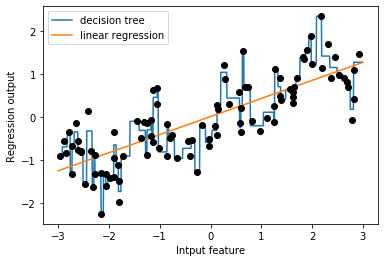

In [4]:
from sklearn.linear_model import LinearRegression#比较线性回归和决策树
from sklearn.tree import DecisionTreeRegressor

X,y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line,reg.predict(line),label="decision tree")

reg = LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line),label="linear regression")

plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("Regression output")
plt.xlabel("Intput feature")
plt.legend(loc="best")


In [10]:
binss = np.linspace(-3,3,11)
which_bin = np.digitize(X,bins=binss)
b = which_bin.reshape(100,)
X_dummies = pd.get_dummies(b)
b

array([ 4, 10,  8,  6,  2,  2,  1,  9,  7,  8,  1, 10,  9,  3,  2,  2,  4,
        6,  5,  3,  7,  2,  3,  4,  5,  8,  2,  6,  6,  1,  7,  2,  1, 10,
       10,  9,  4,  1,  7,  5,  2,  5,  1, 10,  3,  7,  4,  6,  6,  2, 10,
        8, 10,  9,  6, 10,  1,  2,  1,  4,  4,  3,  9,  4,  3,  6,  2,  9,
        1, 10,  8,  2,  1,  9,  8,  8,  8,  1,  4,  2,  9,  7,  4,  1,  4,
        4,  8,  7,  9,  5,  2,  8,  8,  6,  8,  5,  6,  5,  1,  2],
      dtype=int64)

In [7]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
encoder.transform(which_bin)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10,include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

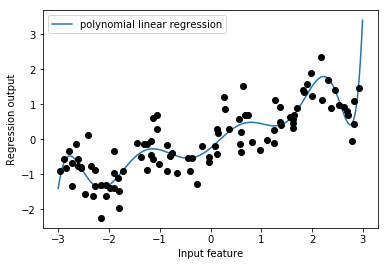

In [51]:
reg = LinearRegression().fit(X_poly,y)
line_poly = poly.transform(line)
plt.plot(line,reg.predict(line_poly),label='polynomial linear regression')
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [1]:
from sklearn.datasets import load_breast_cancer#单变量统计
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))
X_w_noise = np.hstack([cancer.data,noise])

X_train,X_test,y_train,y_test = train_test_split(X_w_noise,cancer.target,random_state=0,test_size=0.5)
select = SelectPercentile(percentile=50)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)
X_train_selected

NameError: name 'np' is not defined

SelectPercentile的选取方式与SelectKBest略有不同，后者如我们之前所示，是选取在某种标准下最好的K个特征；而前者，则是在给定一个0到1之间的百分比x%的情况下，选择最好的x%的特征。比如10个特征，前20%的特征就是最好的两个特征，以此类推。

In [82]:
from sklearn.feature_selection import SelectFromModel#基于模型的特征选择
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=0),threshold="median")
select.fit(X_train,y_train)
X_selected = select.transform(X_train)

In [85]:
from sklearn.feature_selection import RFE#迭代特征选择
select = RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=40)
select.fit(X_train,y_train)
X_selected = select.transform(X_train)